In [1]:
# Rohit Gupta, IIIT-Delhi

# Data in form of csv for the MNIST dataset is available at following links: 
# https://www.kaggle.com/c/digit-recognizer/data 

# training dataset link: 
# https://pjreddie.com/media/files/mnist_train.csv 

# test dataset link : 
# https://pjreddie.com/media/files/mnist_test.csv

# read csv from url for training and test dataset links : 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

url_train = "https://pjreddie.com/media/files/mnist_train.csv"
train_data = pd.read_csv(url_train)

url_test = "https://pjreddie.com/media/files/mnist_test.csv"
test_data = pd.read_csv(url_test)

In [2]:
# check if data has been loaded : 
# check shape

train_data.shape

(59999, 785)

In [3]:
test_data.shape

(9999, 785)

In [4]:
# view dataframe : 

train_data.head(5)
# here the column name with '5' represents labels - (the digits from 0 to 9)

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590,0.591,0.592,0.593,0.594,0.595,0.596,0.597,0.598,0.599,0.600,0.601,0.602,0.603,0.604,0.605,0.606,0.607,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# save the labels and drop the column -  because this column is not eventually needed
# when computing the pca. however will be needed during the visualization hence we will
# store it separately 

labels = train_data['5']

In [6]:
print(labels)

0        0
1        4
2        1
3        9
4        2
        ..
59994    8
59995    3
59996    5
59997    6
59998    8
Name: 5, Length: 59999, dtype: int64


In [7]:
# drop the labels column from the train dataset: 
train_data = train_data.drop('5',axis=1)

# check if labels are removed from dataset: 
train_data.head(5)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590,0.591,0.592,0.593,0.594,0.595,0.596,0.597,0.598,0.599,0.600,0.601,0.602,0.603,0.604,0.605,0.606,0.607,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
train_data.shape
#labels.shape

(59999, 784)

Performing PCA

In [9]:
# we will perform pca, on a smaller subset of data for time efficiency : 
# we will take 18K points from the train_data set : 

# create new dataframes: 

train_data_subset = train_data.head(18000)
labels_subset = labels.head(18000)

In [10]:
train_data_subset.shape

(18000, 784)

In [11]:
# Produce 32 Dimension feature space using PCA : 
# import the model 
from sklearn.decomposition import PCA

# data setup
sample_data_1 = train_data.head(10000)
sample_labels_1 = labels.head(10000)

# instantiate the 32D feature space : 
pca = PCA(n_components=32)

# run the model on the data:
pca_data_32dim = pca.fit_transform(sample_data_1)

# get the shape of the data:
print(pca_data_32dim.shape)


(10000, 32)


In [12]:
# Produce the pca plot using pc1 and pc2 component : 
from sklearn.decomposition import PCA

# setup data : 
sample_data_2 = train_data.head(8000)
sample_lables_2 = labels.head(8000)

# initantiate the model 
pca = PCA(n_components=2)

# run the model on the data
pca_data = pca.fit_transform(sample_data_2)

# get shape of resulting data : 
print(pca_data.shape)

(8000, 2)


In [13]:
# finalize a dataframe with columns : 1st prinicpal component, 2nd principal component and the corresponding labels.
pca_data_f = np.vstack((pca_data.T, sample_lables_2)).T
print(pca_data_f.shape)

(8000, 3)


In [14]:
pca_final_df = pd.DataFrame(data=pca_data_f,columns=['pc1','pc2','labels'])
pca_final_df.head(5)

,pc1,pc2,labels
0,1045.735306,354.176824,0.0
1,-49.639939,-418.614659,4.0
2,-892.232930,578.616502,1.0
3,-345.462685,-732.056909,9.0
4,185.099585,-201.062160,2.0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


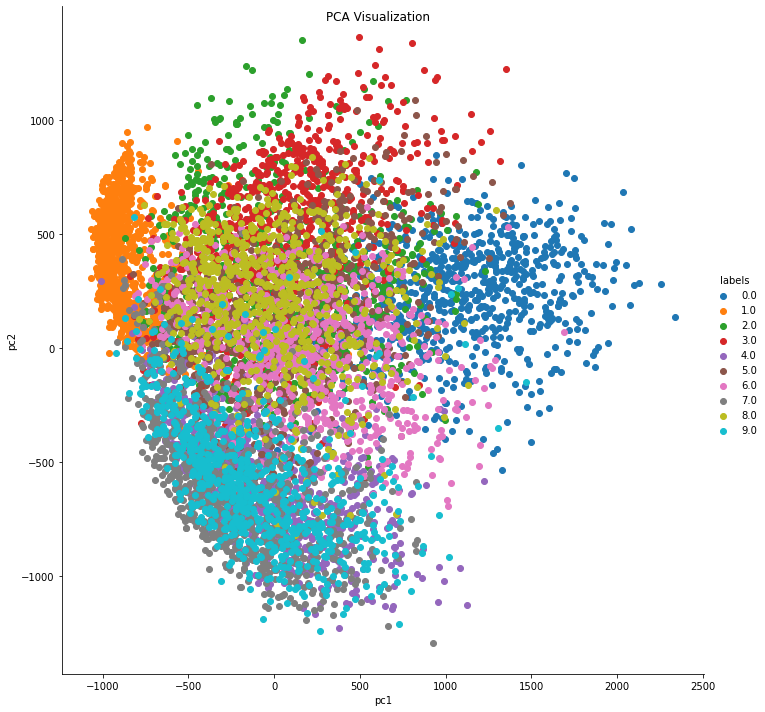

In [15]:
sns.FacetGrid(pca_final_df, hue="labels", size=10).map(plt.scatter, 'pc1', 'pc2').add_legend()
plt.suptitle('PCA Visualization')
plt.show()

In [16]:
# using tSNE for visualization : to see if we can get better separation of clusters than before : 
from sklearn.manifold import TSNE

# setup data : 
sample_data_2 = train_data.head(5000)
sample_lables_2 = labels.head(5000)

# initantiate the model 
tSNE = TSNE(n_components=2,perplexity=30)

# run the model on the data
tSNE_data = tSNE.fit_transform(sample_data_2)

# get shape of resulting data : 
print(tSNE_data.shape)

(5000, 2)


In [17]:
# finalize a dataframe with columns : 1st prinicpal component, 2nd principal component and the corresponding labels.
tSNE_data_f = np.vstack((tSNE_data.T, sample_lables_2)).T

print(tSNE_data_f.shape)

(5000, 3)


In [18]:
tSNE_df = pd.DataFrame(data=tSNE_data_f,columns=['pc1','pc2','labels'])
tSNE_df.head(10)

,pc1,pc2,labels
0,69.010078,-20.594427,0.0
1,-31.041782,-46.486832,4.0
2,-25.457653,66.563515,1.0
3,-26.207150,-11.818648,9.0
4,25.269960,69.798904,2.0
5,-8.103139,15.500581,1.0
6,37.045006,23.965237,3.0
7,-14.265261,18.989231,1.0
8,-58.051086,-15.575143,4.0
9,46.577538,16.157001,3.0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


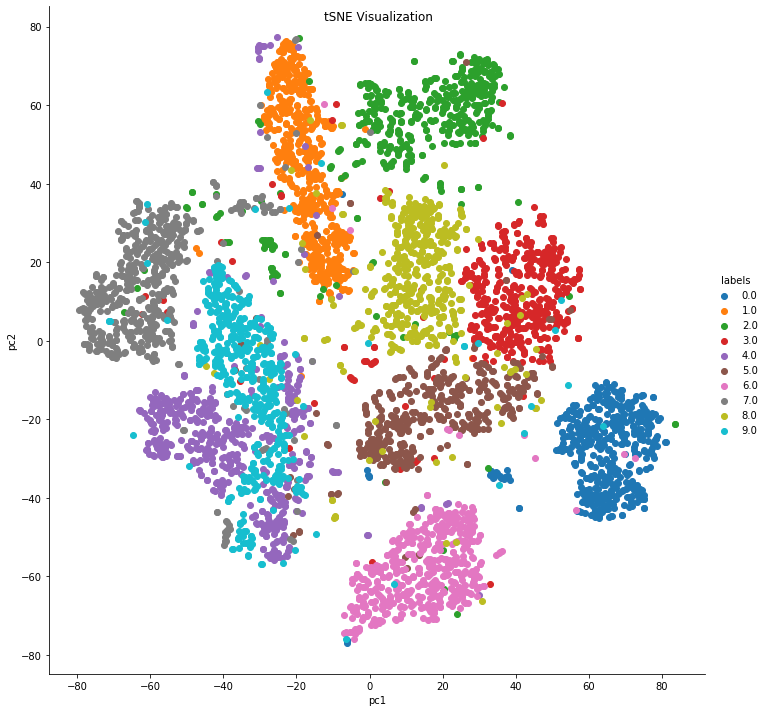

In [19]:
sns.FacetGrid(tSNE_df, hue="labels", size=10).map(plt.scatter, 'pc1', 'pc2').add_legend()
plt.suptitle('tSNE Visualization')
plt.show()

In [20]:
# we get a better separation of clusters than PCA. The clusters are easily identifiable.
# Let us see the visualization using UMAP if we can get better separation of clusters :

!pip install 'umap-learn==0.3.10'
import umap

# get umap embeddings 
umap_embeddings = umap.UMAP().fit_transform(sample_data_2)

     |████████████████████████████████| 40 kB 6.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.3.10-py3-none-any.whl size=38883 sha256=deaa1495a7077232dbea3a1f2d3c183cd4ef6de3a0354d94af97c5240f2502d4
  Stored in directory: /root/.cache/pip/wheels/ea/d0/8f/9e64bfc5ed0645f89b639196bef92daf5c704285133efce12f
Successfully built umap-learn


/usr/local/lib/python3.7/dist-packages/numba/core/typed_passes.py:314: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../usr/local/lib/python3.7/dist-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/usr/local/lib/python3.7/dist-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../usr/local/lib/python3.7/dist-packages/umap/utils.py", line 409:
@numba.njit(parall

In [21]:
print(umap_embeddings.shape)
umap_df = np.vstack((umap_embeddings.T,sample_lables_2)).T

# get datafrane for visualization
umap_data_final = pd.DataFrame(data=umap_df,columns=['umap1','umap2','labels'])

(5000, 2)


In [22]:
umap_data_final.shape

(5000, 3)

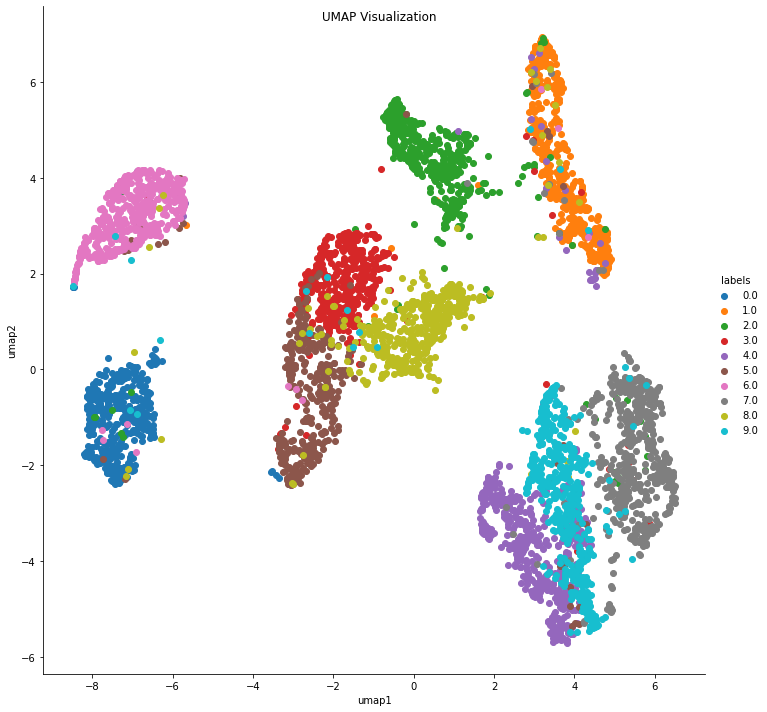

In [23]:
#sns.set_style("whitegrid", {'axes.grid' : False})
sns.FacetGrid(umap_data_final, hue="labels", height=10).map(plt.scatter, 'umap1', 'umap2').add_legend()
plt.suptitle('UMAP Visualization')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'UMAP Visualization (MNIST Data)')

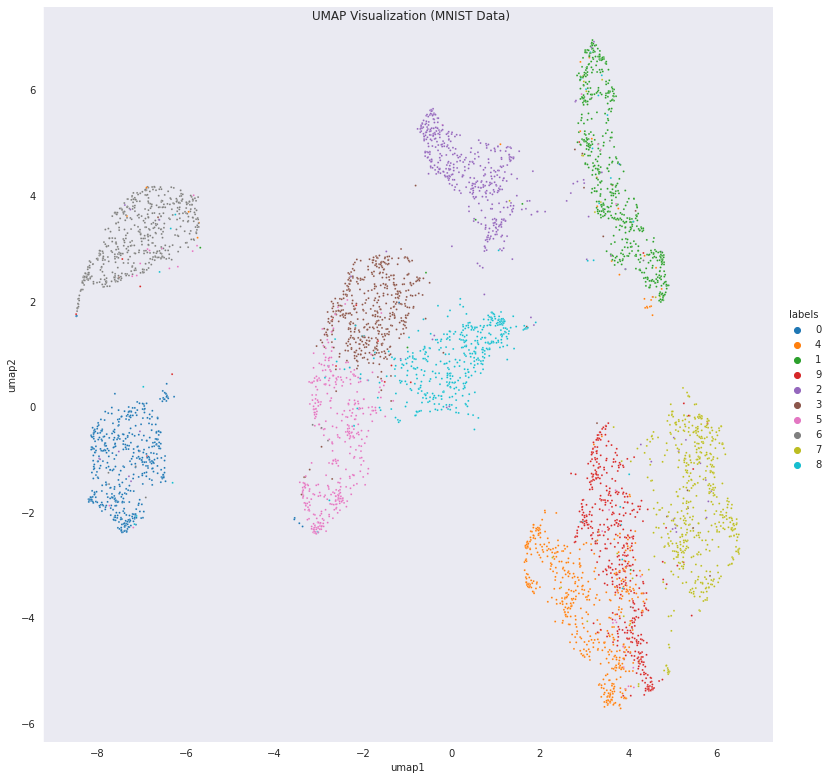

In [29]:
################################################

# NOTE : Please Re-run the cell again if labels are not properly printed alongside the plot. 

################################################

# Refining the 2D Plot with better theme and layout :
sns.set_style("darkgrid", {'axes.grid' : False})

#adjusting plot dots with plot_kws

ax = sns.pairplot(x_vars = ["umap1"], y_vars = ["umap2"], data = umap_data_final, hue = "labels", size=11, plot_kws={"s": 4})
ax.fig.suptitle('UMAP Visualization (MNIST Data)') 

In [25]:
# We get even better separation than tSNE and PCA using 5K data points. 
# We can use more datapoints and see how the visualization would look like.

Part 3 : Interactive Visualization : 

In [26]:
# Interactive visualization : 
# Incase any error - these packages need to be installed first.
%%capture
%pip install bokeh  

In [28]:
######################################################################

## NOTE :  Please rerun the cell again incase there is no output if all cells have been run once.

###################################################################
# import libraries for bokeh visualization 
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from bokeh.resources import INLINE
output_notebook()


# define hover tool
from bokeh.models import HoverTool

#load libraries for the color definition
from bokeh.transform import linear_cmap
from bokeh.palettes import d3
from bokeh.models import CategoricalColorMapper

# define hover tools : these will pop up when the cursor moves in the visualization grid
hover = HoverTool(
    # we print the class label 
    # and the index in the dataframe
    # in the tooltip
    tooltips = [('labels','@labels'),
               ('index', '$index')]
)

# create and initialize the figure with the hover tool, box zoom, cross hair and undo buttons on the side panel 
fig_scat = figure(tools=[hover, 'box_zoom', 'crosshair', 'undo'], plot_width=800)

# pass the dataframe that bokeh will use to render the visualization.
# here we are using the umap embeddings because they gave us the best separation of clusters as well as clarity. 
source2 = ColumnDataSource(umap_data_final)

# convert labels to type string so that palette can fill colors as per the labels(digits in mnist data)
umap_data_final['labels'] = labels.astype('str')

# define color rendering for the labels
palette = d3['Category10'][10]
cmap = CategoricalColorMapper(
    factors=umap_data_final['labels'].unique(),
    palette=palette
)


# scatter plot in figure
fig_scat.scatter(x='umap1', y='umap2', color={'field': 'labels', 'transform': cmap},alpha=0.8,source = source2)

# display below
show(fig_scat)

# the following actions can be done in the interactive visualization : 

#1. Zoom into the plot. Zoom out. 
#2. Description of the point is provided on hovering over any point in the cluster - the corresponding
#   label (the digit) and the index. 

#3. and undo option - to revert back to normal viewing mode after zooming in/zooming out. 